# 小组展示：识别可比公司的拓展

小组成员及分工：

2020213512卢左媛（斯皮尔曼系数定义节点和边）

2020213515潘越 （用公司PE值定义节点和边）

2020213447王劲草（用igraph方法绘图并整合）

2020213543雍敏敏（用networkx方法绘图）

2020213538严文（用networkx方法绘图）

2020213513倪若洋（用Gephi方法绘图）

2020219019杨贺翔（用Gephi方法绘图）

## 1. 定义节点和边

### 1.1 载入数据

In [1]:
import os
import codecs
import re
import pandas as pd
import numpy as np
root_dir = 'C:\\Users\\Administrator'

In [2]:
### 导入个股日回报率数据 ###

df = pd.read_excel(f'{root_dir}\\TRD_Dalyr.xlsx')
df.columns = df.iloc[0]
df = df[2:]
df 

,证券代码,交易日期,日开盘价,日最高价,日最低价,日收盘价,日个股交易股数,日个股交易金额,日个股流通市值,考虑现金红利再投资的日个股回报率
2,000030,2019-01-02,3.7,3.74,3.68,3.69,1213447,4.48901e+06,6.45957e+06,-0.005391
3,000030,2019-01-03,3.69,3.74,3.65,3.68,1390557,5.14329e+06,6.44207e+06,-0.00271
4,000030,2019-01-04,3.66,3.83,3.65,3.83,3633833,1.36714e+07,6.70465e+06,0.040761
5,000030,2019-01-07,3.86,3.92,3.8,3.91,3231319,1.25489e+07,6.8447e+06,0.020888
6,000030,2019-01-08,3.89,4.02,3.89,3.96,4565823,1.8103e+07,6.93223e+06,0.012788
...,...,...,...,...,...,...,...,...,...,...
91659,603998,2019-12-25,7.9,8.14,7.85,7.96,9563400,76666922,3.38457e+06,0.001258
91660,603998,2019-12-26,7.9,8.06,7.82,8.05,8234311,65243742,3.42283e+06,0.011307
91661,603998,2019-12-27,8.02,8.25,7.87,7.89,11510300,92773212,3.3548e+06,-0.019876
91662,603998,2019-12-30,8.15,8.28,7.98,8.11,15156241,123249733,3.44835e+06,0.027883


In [3]:
### reshape df ###
df_data = df[ ['证券代码', '交易日期', '考虑现金红利再投资的日个股回报率'] ]
df_data['考虑现金红利再投资的日个股回报率'] = df_data['考虑现金红利再投资的日个股回报率'].astype('float')
df_wide = df.pivot(index='交易日期', columns='证券代码', values='考虑现金红利再投资的日个股回报率')
df_wide

<ipython-input-3-7e8b471a3890>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['考虑现金红利再投资的日个股回报率'] = df_data['考虑现金红利再投资的日个股回报率'].astype('float')


证券代码,000030,000153,000156,000338,000403,000423,000513,000518,000534,000538,...,603718,603779,603788,603808,603839,603858,603877,603919,603997,603998
交易日期,,,,,,,,,,,,,,,,,,,,,
2019-01-02,-0.005391,0.013592,0.006305,-0.018182,-0.030977,0,-0.054076,-0.037572,0.010536,-0.027447,...,-0.052133,-0.020377,-0.020069,-0.02032,-0.028972,-0.012263,-0.034061,-0.000856,0.014379,-0.029979
2019-01-03,-0.00271,0,0.007519,-0.009259,-0.006148,-0.012642,-0.011349,-0.033033,0.004739,-0.026971,...,-0.066667,0,-0.028955,-0.032055,-0.004812,-0.004806,0.001653,-0.006855,0.018041,0.011038
2019-01-04,0.040761,0.024904,0.031095,0.016021,0.045773,0.020487,0.063776,0.018634,-0.006604,0.013716,...,0.002679,0.010015,0.014545,0.013636,0.007737,0.025352,0.006601,0.015531,-0.005063,0.030568
2019-01-07,0.020888,0.026168,0.030157,0.00657,0.054811,0.006274,-0.003597,0.030488,0.00095,0.020437,...,0.024933,0.003051,0.012903,0.011531,0.002879,0.009027,0.003279,0.003398,0,0.033898
2019-01-08,0.012788,0.054645,0.005855,0,-0.003364,0.006484,0.004813,-0.068047,-0.013283,0.024724,...,0.002606,-0.010646,-0.006369,-0.017733,-0.002871,-0.003112,0.002723,-0.007621,-0.001272,0.008197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-25,-0.014583,-0.00625,-0.003012,0.006583,-0.002954,-0.005762,0.001823,0,0.003304,0.006708,...,-0.007048,-0.041796,0.044288,0.015464,0.10017,-0.007303,0.013005,-0.00403,-0.018138,0.001258
2019-12-26,0.002114,0.004717,0.040282,-0.001308,0.009875,0.013909,-0.00849,-0.003012,0.005488,-0.006212,...,0.004732,0.050081,-0.00799,0.055838,0.088735,0.00049,0.011486,0.005202,0.036946,0.011307
2019-12-27,-0.006329,-0.004695,-0.030978,0.005894,0.001956,-0.002572,-0.004281,-0.003021,-0.00655,-0.00375,...,-0.014914,-0.038462,-0.01425,0.004808,-0.032601,-0.002451,-0.008684,-0.004025,-0.026128,-0.019876


### 1.2 公司两两组合

In [4]:
from itertools import combinations

# 股票代码两两组合
stock_code_set = set(df['证券代码'])
stock_code_pairs = [i for i in combinations(stock_code_set, 2)]
print(len(stock_code_pairs))
stock_code_pairs[:10]

70876


[('000915', '600501'),
 ('000915', '300239'),
 ('000915', '600189'),
 ('000915', '002287'),
 ('000915', '600573'),
 ('000915', '300142'),
 ('000915', '300507'),
 ('000915', '600513'),
 ('000915', '600197'),
 ('000915', '601127')]

### 统计三大系数 ：pearson（皮尔森）, spearman（斯皮尔曼）, kendall（肯德尔）

###  肯德尔相关性系数，又称肯德尔秩相关系数，它也是一种秩相关系数，不过它所计算的对象是分类变量。 
    分类变量可以理解成有类别的变量，可以分为：
    (1) 无序的，比如性别（男、女）、血型（A、B、O、AB）； 
    (2) 有序的，比如肥胖等级（重度肥胖，中度肥胖、轻度肥胖、不肥胖）。 
    通常需要求相关性系数的都是有序分类变量。

### 综上，选择 spearman（斯皮尔曼）进行进一步验证
    （1）不会出现像皮尔森系数那样分母为0而无法计算的情况。
    （2）即使出现异常值，由于异常值的秩次通常不会有明显的变化（比如过大或者过小，那要么排第一，要么排最后），所以对斯皮尔曼相关性系数的影响也非常小！由于斯皮尔曼相关性系数没有那些数据条件要求，适用的范围就广多了。

###  spearman（斯皮尔曼）相关系数

In [5]:
from scipy.stats.stats import  spearmanr

### 两两 merge，求  spearmanr 相关系数 ###

df_data = df[ ['证券代码', '交易日期', '考虑现金红利再投资的日个股回报率'] ]
df_data['考虑现金红利再投资的日个股回报率'] = df_data['考虑现金红利再投资的日个股回报率'].astype('float')

result_list = []
n = 0 
for i, j in stock_code_pairs:
    
    n += 1
    # spearmanr 相关系数
    x = np.asarray(df_wide[[i, j]].dropna(how='any')[i])
    y = np.asarray(df_wide[[i, j]].dropna(how='any')[j])
    coeff, p_value = spearmanr(x, y)
    
    # add to result_list
    result_list.append((i, j, coeff, round(p_value, 4)))
    
    # report
    if n % 1000 == 0:
        print(f'-- {n/len(stock_code_pairs):.2%} finished. ({n}/{len(stock_code_pairs)})', flush=True)

result_df = pd.DataFrame(result_list, columns=['stock_i', 'stock_j', 'coeff', 'p_value'])
result_df

<ipython-input-5-78f29486cfa6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['考虑现金红利再投资的日个股回报率'] = df_data['考虑现金红利再投资的日个股回报率'].astype('float')


-- 1.41% finished. (1000/70876)
-- 2.82% finished. (2000/70876)
-- 4.23% finished. (3000/70876)
-- 5.64% finished. (4000/70876)
-- 7.05% finished. (5000/70876)
-- 8.47% finished. (6000/70876)
-- 9.88% finished. (7000/70876)
-- 11.29% finished. (8000/70876)
-- 12.70% finished. (9000/70876)
-- 14.11% finished. (10000/70876)
-- 15.52% finished. (11000/70876)
-- 16.93% finished. (12000/70876)
-- 18.34% finished. (13000/70876)
-- 19.75% finished. (14000/70876)
-- 21.16% finished. (15000/70876)
-- 22.57% finished. (16000/70876)
-- 23.99% finished. (17000/70876)
-- 25.40% finished. (18000/70876)
-- 26.81% finished. (19000/70876)
-- 28.22% finished. (20000/70876)
-- 29.63% finished. (21000/70876)
-- 31.04% finished. (22000/70876)
-- 32.45% finished. (23000/70876)
-- 33.86% finished. (24000/70876)
-- 35.27% finished. (25000/70876)
-- 36.68% finished. (26000/70876)
-- 38.09% finished. (27000/70876)
-- 39.51% finished. (28000/70876)
-- 40.92% finished. (29000/70876)
-- 42.33% finished. (30000/708

,stock_i,stock_j,coeff,p_value
0,000915,600501,0.263071,0.0
1,000915,300239,0.325716,0.0
2,000915,600189,0.436960,0.0
3,000915,002287,0.379621,0.0
4,000915,600573,0.265384,0.0
...,...,...,...,...
70871,000929,300199,0.503793,0.0
70872,000929,002294,0.442081,0.0
70873,000957,300199,0.429540,0.0
70874,000957,002294,0.337103,0.0


### 1.3 定义边

In [6]:
# 观察相关系数的分布
result_df[['coeff', 'p_value']].describe()

,coeff,p_value
count,70876.000000,70876.000000
mean,0.367834,0.004504
std,0.113442,0.040028
min,-0.071806,0.000000
25%,0.290376,0.000000
50%,0.367447,0.000000
75%,0.445198,0.000000
max,0.816460,0.997200


In [7]:
# 将阈值设在 0.5
len(result_df[abs(result_df['coeff']) >= 0.5])

8722

In [8]:
# 保留相关系数足够高的边 #

df_keep = result_df[(abs(result_df['coeff']) >= 0.5) & (result_df['p_value'] < 0.01)][['stock_i', 'stock_j', 'coeff']]
df_keep = df_keep.sort_values(by=['stock_i', 'stock_j'])
df_keep


,stock_i,stock_j,coeff
42884,000030,000153,0.523983
42804,000030,000559,0.537774
42755,000030,000623,0.524535
42832,000030,000952,0.523158
42820,000030,002029,0.538114
...,...,...,...
69998,603998,300485,0.563331
70007,603998,300534,0.557498
69997,603998,600479,0.560661
70003,603998,600535,0.530622


In [9]:
# 准备边列表
edges_list = [(value[0], value[1], value[2]) for index, value in df_keep[['stock_i', 'stock_j', 'coeff']].iterrows()]
edges_list[:20]

[('000030', '000153', 0.5239830993965929),
 ('000030', '000559', 0.5377737392512345),
 ('000030', '000623', 0.5245350586923369),
 ('000030', '000952', 0.5231584300320484),
 ('000030', '002029', 0.5381135505837028),
 ('000030', '002107', 0.5031270818773547),
 ('000030', '002198', 0.5400879544994381),
 ('000030', '002283', 0.5913942752090839),
 ('000030', '002363', 0.5066460753333132),
 ('000030', '002454', 0.56683533173708),
 ('000030', '002762', 0.5302073369710596),
 ('000030', '002826', 0.514224050614406),
 ('000030', '300254', 0.5176994091080066),
 ('000030', '300485', 0.512271413386857),
 ('000030', '300519', 0.5222207241603238),
 ('000030', '600081', 0.5068014444890516),
 ('000030', '600148', 0.5089700922737517),
 ('000030', '600178', 0.5193358260751693),
 ('000030', '600252', 0.5067289429431534),
 ('000030', '600351', 0.5172562016110814)]

### 1.4 准备节点信息

In [10]:
### 准备 node 信息 ###
pd.options.display.max_columns = None 

### raw data ###
df_fs = pd.read_csv(f'{root_dir}\\Financial_Statements_2012-2019.txt', engine="python", encoding='utf8')
df_fs.columns = [re.sub(r'\s+|\_元', '', x) for x in df_fs.columns]
df_fs['Stkcd'] = df_fs['Stkcd'].astype('str')
df_fs['Stkcd'] = df_fs['Stkcd'].apply(lambda x: x.zfill(6))
df_fs = df_fs[df_fs['year'] == 2019]
df_fs = df_fs.dropna()
df_fs = df_fs.reset_index(drop=True)

# df_Stkcd
stock_code_sorted = list(stock_code_set)
stock_code_sorted.sort()
df_Stkcd = pd.DataFrame(stock_code_sorted, columns=['Stkcd'])

# df_nodes
df_nodes = pd.merge(left=df_Stkcd, right=df_fs, on=['Stkcd'], how='left')
df_nodes = df_nodes.sort_values(by=['Stkcd'])
df_nodes

,Stkcd,year,ShortName,FullName,IndustryName,IndustryCode,营业收入,营业成本,销售费用,管理费用,财务费用,资产减值损失,公允价值变动收益,投资收益,汇兑收益,其他业务利润,营业利润,营业外收入,营业外支出,利润总额,所得税费用,影响净利润的其他项目,净利润,归属于母公司所有者的净利润,少数股东损益,基本每股收益,稀释每股收益,其他综合收益_损失_,综合收益总额,归属于母公司所有者的综合收益,归属少数股东的综合收益,货币资金,交易性金融资产,应收票据净额,应收账款净额,预付款项净额,应收利息净额,应收股利净额,其他应收款净额,存货净额,一年内到期的非流动资产,其他流动资产,流动资产合计,可供出售金融资产净额,持有至到期投资净额,长期应收款净额,长期股权投资净额,投资性房地产净额,固定资产净额,在建工程净额,工程物资,固定资产清理,生产性生物资产净额,油气资产净额,无形资产净额,开发支出,商誉净额,长期待摊费用,递延所得税资产,其他非流动资产,非流动资产合计,资产总计,短期借款,交易性金融负债,应付票据,应付账款,预收款项,应付职工薪酬,应交税费,应付利息,应付股利,其他应付款,一年内到期的非流动负债,其他流动负债,递延收益_流动负债,流动负债合计,长期借款,应付债券,长期应付款,专项应付款,长期负债合计,预计负债,递延所得税负债,其他非流动负债,递延收益_非流动负债,非流动负债合计,负债合计,实收资本_或股本_,其他权益工具,资本公积,盈余公积,未分配利润,外币报表折算差额,专项储备,其他综合收益,归属于母公司所有者权益合计,少数股东权益,所有者权益合计,负债与所有者权益总计,销售商品、提供劳务收到的现金,收到的税费返还,收到的其他与经营活动有关的现金,购买商品、接受劳务支付的现金,支付给职工以及为职工支付的现金,支付的各项税费,支付其他与经营活动有关的现金,经营活动产生的现金流量净额,收回投资收到的现金,取得投资收益收到的现金,处置固定资产、无形资产和其他长期资产收回的现金净额,处置子公司及其他营业单位收到的现金净额,收到的其他与投资活动有关的现金,购建固定资产、无形资产和其他长期资产支付的现金,投资支付的现金,取得子公司及其他营业单位支付的现金净额,支付其他与投资活动有关的现金,投资活动产生的现金流量净额,吸收投资收到的现金,吸收权益性投资收到的现金,发行债券收到的现金,取得借款收到的现金,收到其他与筹资活动有关的现金,偿还债务支付的现金,分配股利、利润或偿付利息支付的现金,支付其他与筹资活动有关的现金,筹资活动产生的现金流量净额,汇率变动对现金及现金等价物的影响,现金及现金等价物净增加额,期初现金及现金等价物余额,期末现金及现金等价物余额
0,000030,2019.0,富奥股份,富奥汽车零部件股份有限公司,汽车制造业,C36,1.006381e+10,8.656970e+09,3.108649e+08,7.197332e+08,-8.618730e+06,1.457514e+07,0.00,5.820123e+08,0.0,5.091449e+07,9.393022e+08,1.264400e+07,3003468.95,9.489428e+08,6.570548e+07,0.0,8.832373e+08,8.909963e+08,-7.759066e+06,0.5000,0.5000,830769.99,8.840680e+08,8.918271e+08,-7.759066e+06,1.402596e+09,1.450000e+08,5.476132e+06,1.851253e+09,7.447431e+07,0.0,0.0,4.060107e+08,9.363937e+08,0.000000e+00,1.979260e+09,6.800464e+09,0.0,0.0,0.000000e+00,2.401752e+09,6.669823e+07,2.345727e+09,3.595374e+08,0.0,0.0,0.0,0.0,4.669467e+08,8.308055e+07,1.042126e+07,5.009826e+07,1.567576e+08,1.791155e+08,6.120134e+09,1.292060e+10,2.221643e+08,0.000000e+00,1.224610e+09,2.431035e+09,1.575926e+07,8.735266e+07,4.051476e+07,0.0,0.0,4.779628e+08,4.158335e+07,0.000000e+00,0.0,4.540982e+09,7.650568e+07,0.000000e+00,5.381235e+07,0.0,1.303180e+08,2.169097e+08,2.751396e+07,1.681473e+07,5.343849e+08,9.259413e+08,5.466923e+09,1.810552e+09,0.00,5.187990e+08,6.785811e+08,3.969465e+09,0.0,2.411232e+07,3.096545e+05,6.660304e+09,7.933718e+08,7.453675e+09,1.292060e+10,7.080256e+09,1.089152e+07,1.145409e+08,4.985088e+09,1.104642e+09,3.440007e+08,4.057983e+08,3.661604e+08,3.820000e+06,5.803235e+08,1.029245e+08,0.0,3.101013e+07,5.811718e+08,1.346150e+08,0.000000e+00,1.456508e+08,-1.433595e+08,6.187500e+07,6.187500e+07,0.0,2.911831e+08,1.300000e+08,2.374743e+08,2.842425e+08,3.984949e+08,-4.371535e+08,-1762671.30,-2.161152e+08,1.589840e+09,1.373725e+09
1,000153,2019.0,丰原药业,安徽丰原药业股份有限公司,医药制造业,C27,3.238064e+09,2.002580e+09,8.592077e+08,2.244643e+08,3.825601e+07,7.842206e+06,2737629.29,1.016252e+07,0.0,3.909816e+07,1.241059e+08,1.634362e+06,5796676.47,1.199436e+08,3.933423e+07,0.0,8.060932e+07,8.092105e+07,-3.117221e+05,0.2589,0.2589,-14313291.14,6.629603e+07,6.660775e+07,-3.117221e+05,3.507260e+08,9.872617e+06,0.000000e+00,6.759525e+08,1.051484e+08,0.0,0.0,3.993498e+07,4.868085e+08,0.000000e+00,7.076350e+07,1.739207e+09,0.0,0.0,1.940000e+08,2.100043e+07,0.000000e+00,7.173508e+08,1.597605e+08,0.0,0.0,0.0,0.0,1.361442e+08,3.517129e+07,1.151271e+07,3.363258e+07,2.157942e+07,4.902560e+08,1.820408e+09,3.559615e+09,4.907590e+08,0.000000e+00,4.988771e+08,4.633907e+08,6.469114e+07,4.611646e+07,4.049588e+07,0.0,0.0,4.283747e+08,2.001667e+06,0.000000e+00,0.0,2.034707e+09,1.051190e+08,0.000000e+00,0.000000e+00,0.0,1.051190e+08,0.000000e+00,1.376262e+07,0.000000e+00,7.890811e+07,1.977897e+08,2.232496e+09,3.121412e+08,0.00,4.955485e+08,3.278270e+07,4.171911e+08,0.0,0.000000e+00,6.665539e+07,1.324319e+09,2.799342e+06,1.327118e+09,3.559615e+09,2.949579e+09,1.161762e+07,1.444160e+08,1.597529e+09,3.025489e+08,2.512665e+08,8.880545e+08,6.621329e+07,7.813405e+05,3.584113e+06,1.100000e+04,0.0,0.000000e+00,1.456177e+08,2.217817e+08,0.000000e+00,0.000000e+00,-3.630230e+08,0.000000e+00,0.000000e+00,0.0,1

### 1.5 计算P/E RATIO

In [11]:
#准备2019年年末的股价信息
df1=df[df['交易日期']=='2019-12-31'] 
df1

,证券代码,交易日期,日开盘价,日最高价,日最低价,日收盘价,日个股交易股数,日个股交易金额,日个股流通市值,考虑现金红利再投资的日个股回报率
245,000030,2019-12-31,4.7,4.79,4.68,4.76,3513680,1.66976e+07,8.37703e+06,0.010616
489,000153,2019-12-31,6.4,6.67,6.39,6.61,9896625,6.48992e+07,2.06217e+06,0.031201
725,000156,2019-12-31,10.5,10.58,10.33,10.44,14146113,1.47624e+08,1.33663e+07,-0.022472
969,000338,2019-12-31,15.65,15.89,15.53,15.88,46530909,7.30942e+08,6.74112e+07,0.014696
1213,000403,2019-12-31,31.44,32.35,31.29,32.3,3282250,1.04926e+08,8.76635e+06,0.028662
...,...,...,...,...,...,...,...,...,...,...
90688,603858,2019-12-31,20.29,20.72,20.23,20.62,16180041,332655293,2.35394e+07,0.016264
90932,603877,2019-12-31,15.3,15.32,14.97,15.27,2129765,32316359,3.06154e+06,-0.019897
91176,603919,2019-12-31,17.69,17.72,17.5,17.71,1889220,33337286,6446440,0.001131
91419,603997,2019-12-31,8.16,8.16,7.99,8.08,2899602,23325171,5.10941e+06,-0.009804


In [12]:
#将两张表按照股票代码合并
df_raw = pd.merge(left=df_fs, right=df1, left_on='Stkcd',right_on='证券代码')
df_raw

,Stkcd,year,ShortName,FullName,IndustryName,IndustryCode,营业收入,营业成本,销售费用,管理费用,财务费用,资产减值损失,公允价值变动收益,投资收益,汇兑收益,其他业务利润,营业利润,营业外收入,营业外支出,利润总额,所得税费用,影响净利润的其他项目,净利润,归属于母公司所有者的净利润,少数股东损益,基本每股收益,稀释每股收益,其他综合收益_损失_,综合收益总额,归属于母公司所有者的综合收益,归属少数股东的综合收益,货币资金,交易性金融资产,应收票据净额,应收账款净额,预付款项净额,应收利息净额,应收股利净额,其他应收款净额,存货净额,一年内到期的非流动资产,其他流动资产,流动资产合计,可供出售金融资产净额,持有至到期投资净额,长期应收款净额,长期股权投资净额,投资性房地产净额,固定资产净额,在建工程净额,工程物资,固定资产清理,生产性生物资产净额,油气资产净额,无形资产净额,开发支出,商誉净额,长期待摊费用,递延所得税资产,其他非流动资产,非流动资产合计,资产总计,短期借款,交易性金融负债,应付票据,应付账款,预收款项,应付职工薪酬,应交税费,应付利息,应付股利,其他应付款,一年内到期的非流动负债,其他流动负债,递延收益_流动负债,流动负债合计,长期借款,应付债券,长期应付款,专项应付款,长期负债合计,预计负债,递延所得税负债,其他非流动负债,递延收益_非流动负债,非流动负债合计,负债合计,实收资本_或股本_,其他权益工具,资本公积,盈余公积,未分配利润,外币报表折算差额,专项储备,其他综合收益,归属于母公司所有者权益合计,少数股东权益,所有者权益合计,负债与所有者权益总计,销售商品、提供劳务收到的现金,收到的税费返还,收到的其他与经营活动有关的现金,购买商品、接受劳务支付的现金,支付给职工以及为职工支付的现金,支付的各项税费,支付其他与经营活动有关的现金,经营活动产生的现金流量净额,收回投资收到的现金,取得投资收益收到的现金,处置固定资产、无形资产和其他长期资产收回的现金净额,处置子公司及其他营业单位收到的现金净额,收到的其他与投资活动有关的现金,购建固定资产、无形资产和其他长期资产支付的现金,投资支付的现金,取得子公司及其他营业单位支付的现金净额,支付其他与投资活动有关的现金,投资活动产生的现金流量净额,吸收投资收到的现金,吸收权益性投资收到的现金,发行债券收到的现金,取得借款收到的现金,收到其他与筹资活动有关的现金,偿还债务支付的现金,分配股利、利润或偿付利息支付的现金,支付其他与筹资活动有关的现金,筹资活动产生的现金流量净额,汇率变动对现金及现金等价物的影响,现金及现金等价物净增加额,期初现金及现金等价物余额,期末现金及现金等价物余额,证券代码,交易日期,日开盘价,日最高价,日最低价,日收盘价,日个股交易股数,日个股交易金额,日个股流通市值,考虑现金红利再投资的日个股回报率
0,000030,2019,富奥股份,富奥汽车零部件股份有限公司,汽车制造业,C36,1.006381e+10,8.656970e+09,3.108649e+08,7.197332e+08,-8.618730e+06,1.457514e+07,0.00,5.820123e+08,0.0,5.091449e+07,9.393022e+08,1.264400e+07,3003468.95,9.489428e+08,6.570548e+07,0.0,8.832373e+08,8.909963e+08,-7.759066e+06,0.5000,0.5000,830769.99,8.840680e+08,8.918271e+08,-7.759066e+06,1.402596e+09,1.450000e+08,5.476132e+06,1.851253e+09,7.447431e+07,0.0,0.0,4.060107e+08,9.363937e+08,0.000000e+00,1.979260e+09,6.800464e+09,0.0,0.0,0.000000e+00,2.401752e+09,6.669823e+07,2.345727e+09,3.595374e+08,0.0,0.0,0.0,0.0,4.669467e+08,8.308055e+07,1.042126e+07,5.009826e+07,1.567576e+08,1.791155e+08,6.120134e+09,1.292060e+10,2.221643e+08,0.000000e+00,1.224610e+09,2.431035e+09,1.575926e+07,8.735266e+07,4.051476e+07,0.0,0.0,4.779628e+08,4.158335e+07,0.000000e+00,0.0,4.540982e+09,7.650568e+07,0.000000e+00,5.381235e+07,0.0,1.303180e+08,2.169097e+08,2.751396e+07,1.681473e+07,5.343849e+08,9.259413e+08,5.466923e+09,1.810552e+09,0.00,5.187990e+08,6.785811e+08,3.969465e+09,0.0,2.411232e+07,3.096545e+05,6.660304e+09,7.933718e+08,7.453675e+09,1.292060e+10,7.080256e+09,1.089152e+07,1.145409e+08,4.985088e+09,1.104642e+09,3.440007e+08,4.057983e+08,3.661604e+08,3.820000e+06,5.803235e+08,1.029245e+08,0.0,3.101013e+07,5.811718e+08,1.346150e+08,0.000000e+00,1.456508e+08,-1.433595e+08,6.187500e+07,6.187500e+07,0.0,2.911831e+08,1.300000e+08,2.374743e+08,2.842425e+08,3.984949e+08,-4.371535e+08,-1762671.30,-2.161152e+08,1.589840e+09,1.373725e+09,000030,2019-12-31,4.7,4.79,4.68,4.76,3513680,1.66976e+07,8.37703e+06,0.010616
1,000153,2019,丰原药业,安徽丰原药业股份有限公司,医药制造业,C27,3.238064e+09,2.002580e+09,8.592077e+08,2.244643e+08,3.825601e+07,7.842206e+06,2737629.29,1.016252e+07,0.0,3.909816e+07,1.241059e+08,1.634362e+06,5796676.47,1.199436e+08,3.933423e+07,0.0,8.060932e+07,8.092105e+07,-3.117221e+05,0.2589,0.2589,-14313291.14,6.629603e+07,6.660775e+07,-3.117221e+05,3.507260e+08,9.872617e+06,0.000000e+00,6.759525e+08,1.051484e+08,0.0,0.0,3.993498e+07,4.868085e+08,0.000000e+00,7.076350e+07,1.739207e+09,0.0,0.0,1.940000e+08,2.100043e+07,0.000000e+00,7.173508e+08,1.597605e+08,0.0,0.0,0.0,0.0,1.361442e+08,3.517129e+07,1.151271e+07,3.363258e+07,2.157942e+07,4.902560e+08,1.820408e+09,3.559615e+09,4.907590e+08,0.000000e+00,4.988771e+08,4.633907e+08,6.469114e+07,4.611646e+07,4.049588e+07,0.0,0.0,4.283747e+08,2.001667e+06,0.000000e+00,0.0,2.034707e+09,1.051190e+08,0.000000e+00,0.000000e+00,0.0,1.051190e+08,0.000000e+00,1.376262e+07,0.000000e+00,7.890811e+07,1.977897e+08,2.232496e+09,3.121412e+08,0.00,4.955485e+08,3.278270e+07,4.171911e+08,0.0,0.000000e+00,6.665539e+07,1.324319e+09,2.799342e+06,1.327118e+09,3.559615e+09,2.949579e+09,1.161762e+07,1.444160e+08,1.597529e+09,3.025489e+08,2.512665e+08,8.880545e+08,6.621329e+07,7.813405

In [13]:
df_raw['P/E ratio']=df_raw['日收盘价']/df_raw['基本每股收益']
df_raw

,Stkcd,year,ShortName,FullName,IndustryName,IndustryCode,营业收入,营业成本,销售费用,管理费用,财务费用,资产减值损失,公允价值变动收益,投资收益,汇兑收益,其他业务利润,营业利润,营业外收入,营业外支出,利润总额,所得税费用,影响净利润的其他项目,净利润,归属于母公司所有者的净利润,少数股东损益,基本每股收益,稀释每股收益,其他综合收益_损失_,综合收益总额,归属于母公司所有者的综合收益,归属少数股东的综合收益,货币资金,交易性金融资产,应收票据净额,应收账款净额,预付款项净额,应收利息净额,应收股利净额,其他应收款净额,存货净额,一年内到期的非流动资产,其他流动资产,流动资产合计,可供出售金融资产净额,持有至到期投资净额,长期应收款净额,长期股权投资净额,投资性房地产净额,固定资产净额,在建工程净额,工程物资,固定资产清理,生产性生物资产净额,油气资产净额,无形资产净额,开发支出,商誉净额,长期待摊费用,递延所得税资产,其他非流动资产,非流动资产合计,资产总计,短期借款,交易性金融负债,应付票据,应付账款,预收款项,应付职工薪酬,应交税费,应付利息,应付股利,其他应付款,一年内到期的非流动负债,其他流动负债,递延收益_流动负债,流动负债合计,长期借款,应付债券,长期应付款,专项应付款,长期负债合计,预计负债,递延所得税负债,其他非流动负债,递延收益_非流动负债,非流动负债合计,负债合计,实收资本_或股本_,其他权益工具,资本公积,盈余公积,未分配利润,外币报表折算差额,专项储备,其他综合收益,归属于母公司所有者权益合计,少数股东权益,所有者权益合计,负债与所有者权益总计,销售商品、提供劳务收到的现金,收到的税费返还,收到的其他与经营活动有关的现金,购买商品、接受劳务支付的现金,支付给职工以及为职工支付的现金,支付的各项税费,支付其他与经营活动有关的现金,经营活动产生的现金流量净额,收回投资收到的现金,取得投资收益收到的现金,处置固定资产、无形资产和其他长期资产收回的现金净额,处置子公司及其他营业单位收到的现金净额,收到的其他与投资活动有关的现金,购建固定资产、无形资产和其他长期资产支付的现金,投资支付的现金,取得子公司及其他营业单位支付的现金净额,支付其他与投资活动有关的现金,投资活动产生的现金流量净额,吸收投资收到的现金,吸收权益性投资收到的现金,发行债券收到的现金,取得借款收到的现金,收到其他与筹资活动有关的现金,偿还债务支付的现金,分配股利、利润或偿付利息支付的现金,支付其他与筹资活动有关的现金,筹资活动产生的现金流量净额,汇率变动对现金及现金等价物的影响,现金及现金等价物净增加额,期初现金及现金等价物余额,期末现金及现金等价物余额,证券代码,交易日期,日开盘价,日最高价,日最低价,日收盘价,日个股交易股数,日个股交易金额,日个股流通市值,考虑现金红利再投资的日个股回报率,P/E ratio
0,000030,2019,富奥股份,富奥汽车零部件股份有限公司,汽车制造业,C36,1.006381e+10,8.656970e+09,3.108649e+08,7.197332e+08,-8.618730e+06,1.457514e+07,0.00,5.820123e+08,0.0,5.091449e+07,9.393022e+08,1.264400e+07,3003468.95,9.489428e+08,6.570548e+07,0.0,8.832373e+08,8.909963e+08,-7.759066e+06,0.5000,0.5000,830769.99,8.840680e+08,8.918271e+08,-7.759066e+06,1.402596e+09,1.450000e+08,5.476132e+06,1.851253e+09,7.447431e+07,0.0,0.0,4.060107e+08,9.363937e+08,0.000000e+00,1.979260e+09,6.800464e+09,0.0,0.0,0.000000e+00,2.401752e+09,6.669823e+07,2.345727e+09,3.595374e+08,0.0,0.0,0.0,0.0,4.669467e+08,8.308055e+07,1.042126e+07,5.009826e+07,1.567576e+08,1.791155e+08,6.120134e+09,1.292060e+10,2.221643e+08,0.000000e+00,1.224610e+09,2.431035e+09,1.575926e+07,8.735266e+07,4.051476e+07,0.0,0.0,4.779628e+08,4.158335e+07,0.000000e+00,0.0,4.540982e+09,7.650568e+07,0.000000e+00,5.381235e+07,0.0,1.303180e+08,2.169097e+08,2.751396e+07,1.681473e+07,5.343849e+08,9.259413e+08,5.466923e+09,1.810552e+09,0.00,5.187990e+08,6.785811e+08,3.969465e+09,0.0,2.411232e+07,3.096545e+05,6.660304e+09,7.933718e+08,7.453675e+09,1.292060e+10,7.080256e+09,1.089152e+07,1.145409e+08,4.985088e+09,1.104642e+09,3.440007e+08,4.057983e+08,3.661604e+08,3.820000e+06,5.803235e+08,1.029245e+08,0.0,3.101013e+07,5.811718e+08,1.346150e+08,0.000000e+00,1.456508e+08,-1.433595e+08,6.187500e+07,6.187500e+07,0.0,2.911831e+08,1.300000e+08,2.374743e+08,2.842425e+08,3.984949e+08,-4.371535e+08,-1762671.30,-2.161152e+08,1.589840e+09,1.373725e+09,000030,2019-12-31,4.7,4.79,4.68,4.76,3513680,1.66976e+07,8.37703e+06,0.010616,9.52
1,000153,2019,丰原药业,安徽丰原药业股份有限公司,医药制造业,C27,3.238064e+09,2.002580e+09,8.592077e+08,2.244643e+08,3.825601e+07,7.842206e+06,2737629.29,1.016252e+07,0.0,3.909816e+07,1.241059e+08,1.634362e+06,5796676.47,1.199436e+08,3.933423e+07,0.0,8.060932e+07,8.092105e+07,-3.117221e+05,0.2589,0.2589,-14313291.14,6.629603e+07,6.660775e+07,-3.117221e+05,3.507260e+08,9.872617e+06,0.000000e+00,6.759525e+08,1.051484e+08,0.0,0.0,3.993498e+07,4.868085e+08,0.000000e+00,7.076350e+07,1.739207e+09,0.0,0.0,1.940000e+08,2.100043e+07,0.000000e+00,7.173508e+08,1.597605e+08,0.0,0.0,0.0,0.0,1.361442e+08,3.517129e+07,1.151271e+07,3.363258e+07,2.157942e+07,4.902560e+08,1.820408e+09,3.559615e+09,4.907590e+08,0.000000e+00,4.988771e+08,4.633907e+08,6.469114e+07,4.611646e+07,4.049588e+07,0.0,0.0,4.283747e+08,2.001667e+06,0.000000e+00,0.0,2.034707e+09,1.051190e+08,0.000000e+00,0.000000e+00,0.0,1.051190e+08,0.000000e+00,1.376262e+07,0.000000e+00,7.890811e+07,1.977897e+08,2.232496e+09,3.121412e+08,0.00,4.955485e+08,3.278270e+07,4.171911e+08,0.0,0.000000e+00,6.665539e+07,1.324319e+09,2.799342e+06,1.327118e+09,3.559615e+09,2.949579e+09,1.161762e+07,1.444160e+08,1.597529e+09,3.025489e+08,2.512665e+08,8.880545e+08,6.6213

In [14]:
df_raw[['P/E ratio']].describe()

,P/E ratio
count,375.000000
unique,375.000000
top,-1.062016
freq,1.000000


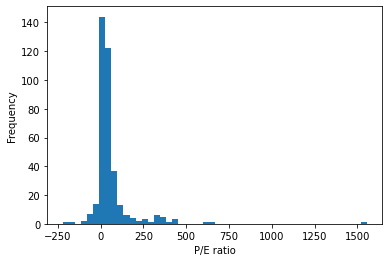

In [15]:
from matplotlib import pyplot
#绘制直方图
def drawHist(heights):
#创建直方图
#第一个参数为待绘制的定量数据，不同于定性数据，这里并没有事先进行频数统计
#第二个参数为划分的区间个数
    pyplot.hist(heights, 50)
    pyplot.xlabel('P/E ratio')
    pyplot.ylabel('Frequency')
    pyplot.show()
drawHist(df_raw['P/E ratio'])

### 1.6 用P/E值准备边列表

In [16]:
#对P/E值进行划分
df_raw.loc[df_raw['P/E ratio']<0, 'Category'] = '0'
df_raw.loc[(df_raw['P/E ratio']<10) & (df_raw['P/E ratio']>=0), 'Category'] = '1'
df_raw.loc[(df_raw['P/E ratio']<15) & (df_raw['P/E ratio']>=10), 'Category'] = '2'
df_raw.loc[(df_raw['P/E ratio']<17.5) & (df_raw['P/E ratio']>=15), 'Category'] = '3'
df_raw.loc[(df_raw['P/E ratio']<20) & (df_raw['P/E ratio']>=17.5), 'Category'] = '4'
df_raw.loc[(df_raw['P/E ratio']<25) & (df_raw['P/E ratio']>=20), 'Category'] = '5'
df_raw.loc[(df_raw['P/E ratio']<30) & (df_raw['P/E ratio']>=25), 'Category'] = '6'
df_raw.loc[(df_raw['P/E ratio']<35) & (df_raw['P/E ratio']>=30), 'Category'] = '7'
df_raw.loc[(df_raw['P/E ratio']<40) & (df_raw['P/E ratio']>=35), 'Category'] = '8'
df_raw.loc[(df_raw['P/E ratio']<50) & (df_raw['P/E ratio']>=40), 'Category'] = '9'
df_raw.loc[(df_raw['P/E ratio']<60) & (df_raw['P/E ratio']>=50), 'Category'] = '10'
df_raw.loc[(df_raw['P/E ratio']>=60), 'Category'] = '11'
df_raw

,Stkcd,year,ShortName,FullName,IndustryName,IndustryCode,营业收入,营业成本,销售费用,管理费用,财务费用,资产减值损失,公允价值变动收益,投资收益,汇兑收益,其他业务利润,营业利润,营业外收入,营业外支出,利润总额,所得税费用,影响净利润的其他项目,净利润,归属于母公司所有者的净利润,少数股东损益,基本每股收益,稀释每股收益,其他综合收益_损失_,综合收益总额,归属于母公司所有者的综合收益,归属少数股东的综合收益,货币资金,交易性金融资产,应收票据净额,应收账款净额,预付款项净额,应收利息净额,应收股利净额,其他应收款净额,存货净额,一年内到期的非流动资产,其他流动资产,流动资产合计,可供出售金融资产净额,持有至到期投资净额,长期应收款净额,长期股权投资净额,投资性房地产净额,固定资产净额,在建工程净额,工程物资,固定资产清理,生产性生物资产净额,油气资产净额,无形资产净额,开发支出,商誉净额,长期待摊费用,递延所得税资产,其他非流动资产,非流动资产合计,资产总计,短期借款,交易性金融负债,应付票据,应付账款,预收款项,应付职工薪酬,应交税费,应付利息,应付股利,其他应付款,一年内到期的非流动负债,其他流动负债,递延收益_流动负债,流动负债合计,长期借款,应付债券,长期应付款,专项应付款,长期负债合计,预计负债,递延所得税负债,其他非流动负债,递延收益_非流动负债,非流动负债合计,负债合计,实收资本_或股本_,其他权益工具,资本公积,盈余公积,未分配利润,外币报表折算差额,专项储备,其他综合收益,归属于母公司所有者权益合计,少数股东权益,所有者权益合计,负债与所有者权益总计,销售商品、提供劳务收到的现金,收到的税费返还,收到的其他与经营活动有关的现金,购买商品、接受劳务支付的现金,支付给职工以及为职工支付的现金,支付的各项税费,支付其他与经营活动有关的现金,经营活动产生的现金流量净额,收回投资收到的现金,取得投资收益收到的现金,处置固定资产、无形资产和其他长期资产收回的现金净额,处置子公司及其他营业单位收到的现金净额,收到的其他与投资活动有关的现金,购建固定资产、无形资产和其他长期资产支付的现金,投资支付的现金,取得子公司及其他营业单位支付的现金净额,支付其他与投资活动有关的现金,投资活动产生的现金流量净额,吸收投资收到的现金,吸收权益性投资收到的现金,发行债券收到的现金,取得借款收到的现金,收到其他与筹资活动有关的现金,偿还债务支付的现金,分配股利、利润或偿付利息支付的现金,支付其他与筹资活动有关的现金,筹资活动产生的现金流量净额,汇率变动对现金及现金等价物的影响,现金及现金等价物净增加额,期初现金及现金等价物余额,期末现金及现金等价物余额,证券代码,交易日期,日开盘价,日最高价,日最低价,日收盘价,日个股交易股数,日个股交易金额,日个股流通市值,考虑现金红利再投资的日个股回报率,P/E ratio,Category
0,000030,2019,富奥股份,富奥汽车零部件股份有限公司,汽车制造业,C36,1.006381e+10,8.656970e+09,3.108649e+08,7.197332e+08,-8.618730e+06,1.457514e+07,0.00,5.820123e+08,0.0,5.091449e+07,9.393022e+08,1.264400e+07,3003468.95,9.489428e+08,6.570548e+07,0.0,8.832373e+08,8.909963e+08,-7.759066e+06,0.5000,0.5000,830769.99,8.840680e+08,8.918271e+08,-7.759066e+06,1.402596e+09,1.450000e+08,5.476132e+06,1.851253e+09,7.447431e+07,0.0,0.0,4.060107e+08,9.363937e+08,0.000000e+00,1.979260e+09,6.800464e+09,0.0,0.0,0.000000e+00,2.401752e+09,6.669823e+07,2.345727e+09,3.595374e+08,0.0,0.0,0.0,0.0,4.669467e+08,8.308055e+07,1.042126e+07,5.009826e+07,1.567576e+08,1.791155e+08,6.120134e+09,1.292060e+10,2.221643e+08,0.000000e+00,1.224610e+09,2.431035e+09,1.575926e+07,8.735266e+07,4.051476e+07,0.0,0.0,4.779628e+08,4.158335e+07,0.000000e+00,0.0,4.540982e+09,7.650568e+07,0.000000e+00,5.381235e+07,0.0,1.303180e+08,2.169097e+08,2.751396e+07,1.681473e+07,5.343849e+08,9.259413e+08,5.466923e+09,1.810552e+09,0.00,5.187990e+08,6.785811e+08,3.969465e+09,0.0,2.411232e+07,3.096545e+05,6.660304e+09,7.933718e+08,7.453675e+09,1.292060e+10,7.080256e+09,1.089152e+07,1.145409e+08,4.985088e+09,1.104642e+09,3.440007e+08,4.057983e+08,3.661604e+08,3.820000e+06,5.803235e+08,1.029245e+08,0.0,3.101013e+07,5.811718e+08,1.346150e+08,0.000000e+00,1.456508e+08,-1.433595e+08,6.187500e+07,6.187500e+07,0.0,2.911831e+08,1.300000e+08,2.374743e+08,2.842425e+08,3.984949e+08,-4.371535e+08,-1762671.30,-2.161152e+08,1.589840e+09,1.373725e+09,000030,2019-12-31,4.7,4.79,4.68,4.76,3513680,1.66976e+07,8.37703e+06,0.010616,9.52,1
1,000153,2019,丰原药业,安徽丰原药业股份有限公司,医药制造业,C27,3.238064e+09,2.002580e+09,8.592077e+08,2.244643e+08,3.825601e+07,7.842206e+06,2737629.29,1.016252e+07,0.0,3.909816e+07,1.241059e+08,1.634362e+06,5796676.47,1.199436e+08,3.933423e+07,0.0,8.060932e+07,8.092105e+07,-3.117221e+05,0.2589,0.2589,-14313291.14,6.629603e+07,6.660775e+07,-3.117221e+05,3.507260e+08,9.872617e+06,0.000000e+00,6.759525e+08,1.051484e+08,0.0,0.0,3.993498e+07,4.868085e+08,0.000000e+00,7.076350e+07,1.739207e+09,0.0,0.0,1.940000e+08,2.100043e+07,0.000000e+00,7.173508e+08,1.597605e+08,0.0,0.0,0.0,0.0,1.361442e+08,3.517129e+07,1.151271e+07,3.363258e+07,2.157942e+07,4.902560e+08,1.820408e+09,3.559615e+09,4.907590e+08,0.000000e+00,4.988771e+08,4.633907e+08,6.469114e+07,4.611646e+07,4.049588e+07,0.0,0.0,4.283747e+08,2.001667e+06,0.000000e+00,0.0,2.034707e+09,1.051190e+08,0.000000e+00,0.000000e+00,0.0,1.051190e+08,0.000000e+00,1.376262e+07,0.000000e+00,7.890811e+07,1.977897e+08,2.232496e+09,3.121412e+08,0.00,4.955485e+08,3.278270e+07,4.171911e+08,0.0,0.000000e+00,6.665539e+07,1.324319e+09,2.799342e+06,1.327118e+09,3.559615e+09,2.949579e+09,1.161762e+07,1.444160e+08,1.597529e+09,3.025489e+08,2.512665e+08,8.880545

In [17]:
#看每个分类有多少家公司
print(len(df_raw.loc[df_raw['Category'] == '0']))
print(len(df_raw.loc[df_raw['Category'] == '1']))
print(len(df_raw.loc[df_raw['Category'] == '2']))
print(len(df_raw.loc[df_raw['Category'] == '3']))
print(len(df_raw.loc[df_raw['Category'] == '4']))
print(len(df_raw.loc[df_raw['Category'] == '5']))
print(len(df_raw.loc[df_raw['Category'] == '6']))
print(len(df_raw.loc[df_raw['Category'] == '7']))
print(len(df_raw.loc[df_raw['Category'] == '8']))
print(len(df_raw.loc[df_raw['Category'] == '9']))
print(len(df_raw.loc[df_raw['Category'] == '10']))
print(len(df_raw.loc[df_raw['Category'] == '11']))

62
6
27
17
20
31
38
25
21
29
15
84


In [18]:
df_raw.dtypes

Stkcd               object
year                 int64
ShortName           object
FullName            object
IndustryName        object
                     ...  
日个股交易金额             object
日个股流通市值             object
考虑现金红利再投资的日个股回报率    object
P/E ratio           object
Category            object
Length: 142, dtype: object

In [19]:
#转换'Category'中的类型，方便后面计算
df_raw['Category'] = df_raw['Category'].astype(int)

In [20]:
df_raw.dtypes

Stkcd               object
year                 int64
ShortName           object
FullName            object
IndustryName        object
                     ...  
日个股交易金额             object
日个股流通市值             object
考虑现金红利再投资的日个股回报率    object
P/E ratio           object
Category             int32
Length: 142, dtype: object

In [21]:
# 根据合并后的DataFrame股票代码两两组合
stock_code_set_1 = set(df_raw['Stkcd'])
stock_code_pairs_1 = [i for i in combinations(stock_code_set_1, 2)]
print(len(stock_code_pairs_1))
stock_code_pairs_1[:10]

70125


[('000915', '600501'),
 ('000915', '300239'),
 ('000915', '600189'),
 ('000915', '002287'),
 ('000915', '600573'),
 ('000915', '300142'),
 ('000915', '300507'),
 ('000915', '600513'),
 ('000915', '600197'),
 ('000915', '601127')]

In [22]:
result_list_1 = []
n = 0
for i, j in stock_code_pairs_1:
    n += 1
    x = df_raw.loc[df_raw['Stkcd'] == i, 'Category'].values[0]
    y = df_raw.loc[df_raw['Stkcd'] == j, 'Category'].values[0]
    sub = abs(x-y)
    result_list_1.append((i, j, sub))
    if n % 1000 == 0:
        print(f'-- {n/len(stock_code_pairs_1):.2%} finished. ({n}/{len(stock_code_pairs_1)})', flush=True)
result_df_1 = pd.DataFrame(result_list_1, columns=['stock_i', 'stock_j', 'sub'])
result_df_1

-- 1.43% finished. (1000/70125)
-- 2.85% finished. (2000/70125)
-- 4.28% finished. (3000/70125)
-- 5.70% finished. (4000/70125)
-- 7.13% finished. (5000/70125)
-- 8.56% finished. (6000/70125)
-- 9.98% finished. (7000/70125)
-- 11.41% finished. (8000/70125)
-- 12.83% finished. (9000/70125)
-- 14.26% finished. (10000/70125)
-- 15.69% finished. (11000/70125)
-- 17.11% finished. (12000/70125)
-- 18.54% finished. (13000/70125)
-- 19.96% finished. (14000/70125)
-- 21.39% finished. (15000/70125)
-- 22.82% finished. (16000/70125)
-- 24.24% finished. (17000/70125)
-- 25.67% finished. (18000/70125)
-- 27.09% finished. (19000/70125)
-- 28.52% finished. (20000/70125)
-- 29.95% finished. (21000/70125)
-- 31.37% finished. (22000/70125)
-- 32.80% finished. (23000/70125)
-- 34.22% finished. (24000/70125)
-- 35.65% finished. (25000/70125)
-- 37.08% finished. (26000/70125)
-- 38.50% finished. (27000/70125)
-- 39.93% finished. (28000/70125)
-- 41.35% finished. (29000/70125)
-- 42.78% finished. (30000/701

,stock_i,stock_j,sub
0,000915,600501,4
1,000915,300239,4
2,000915,600189,7
3,000915,002287,0
4,000915,600573,4
...,...,...,...
70120,000929,300199,11
70121,000929,002294,5
70122,000957,300199,11
70123,000957,002294,5


In [23]:
#观察结果的分布
result_df_1[['sub']].describe()

,sub
count,70125.000000
mean,4.492007
std,3.282353
min,0.000000
25%,2.000000
50%,4.000000
75%,7.000000
max,11.000000


In [24]:
#相近的距离为0作为阈值，有多少条边？
print(len(result_df_1[result_df_1['sub'] == 0]))

#相近的距离为1作为阈值，有多少条边？
print(len(result_df_1[result_df_1['sub'] <= 1]))

8258
15168


In [25]:
#准备边列表
df_keep_1 = result_df_1[result_df_1['sub'] <= 1 ][['stock_i', 'stock_j', 'sub']]
df_keep_1 = df_keep_1.sort_values(by=['stock_i', 'stock_j'])
df_keep_1
edges_list_1 = [(value[0], value[1], value[2]) for index, value in df_keep_1[['stock_i', 'stock_j', 'sub']].iterrows()]
edges_list_1[:20]

[('000030', '000423', 1),
 ('000030', '000581', 0),
 ('000030', '000623', 1),
 ('000030', '000650', 1),
 ('000030', '000760', 1),
 ('000030', '000766', 1),
 ('000030', '000802', 1),
 ('000030', '000892', 1),
 ('000030', '000908', 1),
 ('000030', '000951', 1),
 ('000030', '000981', 1),
 ('000030', '000999', 1),
 ('000030', '002020', 1),
 ('000030', '002029', 1),
 ('000030', '002071', 1),
 ('000030', '002198', 1),
 ('000030', '002219', 1),
 ('000030', '002269', 1),
 ('000030', '002283', 1),
 ('000030', '002284', 1)]

## 2. 用三种方法构建网络

### 2.1 用课上说过的igraph构建网络

In [26]:
import sys  

sys.version

'3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]'

In [27]:
# !pip uninstall igraph
# !pip install pycairo‑1.20.0‑cp38‑cp38‑win_amd64.whl
# !pip install python_igraph‑0.9.0‑cp38‑cp38‑win_amd64.whl

In [28]:
import igraph

#### 2.1.1  spearman相关系数定义边 + igraph

In [29]:
# initiate graph
g = igraph.Graph(directed=False)

# vertices
g.add_vertices(df_nodes['Stkcd']) # 顶点的 index 仍然是 id，而 Stkcd 会作为 name 属性加入进去

In [30]:
# edges: 接受的是顶点 id 
edges = []
for i in edges_list:
    edges.append((g.vs.find(name=i[0]).index, g.vs.find(name=i[1]).index)) # 根据 name（Stkcd）反查节点 id
g.add_edges(edges)

In [31]:
### 生成属性 ###

# node attributes
g.vs['label'] = df_nodes['ShortName']
g.vs['IndustryName'] = df_nodes['IndustryName']
g.vs['degree'] = g.degree()

# edge attributes
g.es['weight'] = [i[2] for i in edges_list]
g.is_weighted()

True

In [32]:
### 在 igraph 中，顶点在 vs，边在 es ###

# 查看顶点信息（查看前10个）
for v in g.vs[:10]:
    print(v)

# 查看边信息（查看前10个）
print(g.get_edgelist()[:10])

for e in g.es[:10]:
    print(f'{e.tuple}, {e}')

igraph.Vertex(<igraph.Graph object at 0x000001C8B69ABC70>, 0, {'name': '000030', 'label': '富奥股份', 'IndustryName': '汽车制造业', 'degree': 36})
igraph.Vertex(<igraph.Graph object at 0x000001C8B69ABC70>, 1, {'name': '000153', 'label': '丰原药业', 'IndustryName': '医药制造业', 'degree': 185})
igraph.Vertex(<igraph.Graph object at 0x000001C8B69ABC70>, 2, {'name': '000156', 'label': '华数传媒', 'IndustryName': '广播、电视、电影和影视录音制作业', 'degree': 44})
igraph.Vertex(<igraph.Graph object at 0x000001C8B69ABC70>, 3, {'name': '000338', 'label': '潍柴动力', 'IndustryName': '汽车制造业', 'degree': 9})
igraph.Vertex(<igraph.Graph object at 0x000001C8B69ABC70>, 4, {'name': '000403', 'label': '双林生物', 'IndustryName': '医药制造业', 'degree': 0})
igraph.Vertex(<igraph.Graph object at 0x000001C8B69ABC70>, 5, {'name': '000423', 'label': '东阿阿胶', 'IndustryName': '医药制造业', 'degree': 10})
igraph.Vertex(<igraph.Graph object at 0x000001C8B69ABC70>, 6, {'name': '000513', 'label': '丽珠集团', 'IndustryName': '医药制造业', 'degree': 41})
igraph.Vertex(<igraph.Gr

In [33]:
### 社群识别 ###

C = g.community_multilevel(weights=g.es['weight']) 
# C = g.community_infomap(edge_weights=None, vertex_weights=None, trials=10)
# C = g.community_optimal_modularity()

# node attribute: comm
for i in range(len(C)):
    for v_i in C.subgraph(i).vs['name']:
        g.vs.find(name=v_i)['comm_id'] = i

# 查看顶点信息，应该包含属性 comm_id
for v in g.vs[:10]:
    print(v)
    
print(f'\nnum of communities: {len(C)}')

igraph.Vertex(<igraph.Graph object at 0x000001C8B69ABC70>, 0, {'name': '000030', 'label': '富奥股份', 'IndustryName': '汽车制造业', 'degree': 36, 'comm_id': 0})
igraph.Vertex(<igraph.Graph object at 0x000001C8B69ABC70>, 1, {'name': '000153', 'label': '丰原药业', 'IndustryName': '医药制造业', 'degree': 185, 'comm_id': 1})
igraph.Vertex(<igraph.Graph object at 0x000001C8B69ABC70>, 2, {'name': '000156', 'label': '华数传媒', 'IndustryName': '广播、电视、电影和影视录音制作业', 'degree': 44, 'comm_id': 0})
igraph.Vertex(<igraph.Graph object at 0x000001C8B69ABC70>, 3, {'name': '000338', 'label': '潍柴动力', 'IndustryName': '汽车制造业', 'degree': 9, 'comm_id': 2})
igraph.Vertex(<igraph.Graph object at 0x000001C8B69ABC70>, 4, {'name': '000403', 'label': '双林生物', 'IndustryName': '医药制造业', 'degree': 0, 'comm_id': 3})
igraph.Vertex(<igraph.Graph object at 0x000001C8B69ABC70>, 5, {'name': '000423', 'label': '东阿阿胶', 'IndustryName': '医药制造业', 'degree': 10, 'comm_id': 1})
igraph.Vertex(<igraph.Graph object at 0x000001C8B69ABC70>, 6, {'name': '000513

In [34]:
### 生成 graph_json 用于 echarts 画图 ###

# 社团编号是igraph随机产生的，不代表规模
# 但是绘图时我们希望大社团在前面
# 需要一个 dict: {"comm_id", comm_id_sort}
temp_list = []
for i in range(len(C)):
     temp_list.append( (-len(C.subgraph(i).vs), i) )
temp_list.sort()
comm_id_map = dict()
for i in range(len(temp_list)):
    comm_id_map[f'{temp_list[i][1]}'] = i


# nodes_json
nodes_json = []
for i in g.vs:
    node_info = {'id': str(i.index)}
    node_info['name'] = i['name'] + '_' + str(i['label'])
    node_info['label'] = i['label']
    node_info['value'] = i['IndustryName']
    node_info['category'] = comm_id_map[f"{i['comm_id']}"] # echarts画图时的颜色分类，根据可视化的需要设定
    nodes_json.append(node_info)

# links_json
links_json = []
for i in g.es:
    link_info = {'source': str(i.tuple[0]), 'target': str(i.tuple[1])}
    link_info['weight'] = i['weight']
    link_info['value'] = round(i['weight'], 5)
    links_json.append(link_info)

# categories_json
categories_json = []
for i in range(len(C)):
    categories_json.append({'name': f'社团{i}'})

# graph_json
graph_json = {'nodes': nodes_json, 'links': links_json, 'categories': categories_json}

In [35]:
import json

In [36]:
# write graph_json.json
writer = codecs.open(f'{root_dir}\\graph_json_spearman.json', 'w', 'utf-8')
writer.write(str(json.dumps(graph_json)))
writer.close()

In [37]:
!pip install pyecharts

In [38]:
from pyecharts import options as opts
from pyecharts.charts import Graph

In [39]:
graph= (
        Graph(init_opts=opts.InitOpts(width="1000px", height="800px"))
        .add("", 
             nodes_json, 
             links_json,
             categories=categories_json,
             layout="force"
             )
        .set_global_opts(title_opts=opts.TitleOpts(title="企业关系图_igraph_spearman"))
    )
graph.render("企业关系图_igraph_spearman.html")

'C:\\Users\\Administrator\\python_for_accounting_auditing_小组作业\\企业关系图_igraph_spearman.html'

得到的html文件截图：![avatar](企业关系图_igraph_spearman.png)

#### 2.1.2  公司PE值定义边 + igraph

mutilevel

In [40]:
# initiate graph
g_1 = igraph.Graph(directed=False)

# vertices
g_1.add_vertices(df_nodes['Stkcd'])

In [41]:
# edges: 接受的是顶点 id 
edges_1 = []
for i in edges_list_1:
    edges_1.append((g_1.vs.find(name=i[0]).index, g_1.vs.find(name=i[1]).index)) # 根据 name（Stkcd）反查节点 id
g_1.add_edges(edges_1)

In [42]:
### 生成属性 ###

# node attributes
g_1.vs['label'] = df_nodes['ShortName']
g_1.vs['IndustryName'] = df_nodes['IndustryName']
g_1.vs['degree'] = g_1.degree()

# edge attributes
g_1.es['weight'] = [i[2] for i in edges_list_1]
g_1.is_weighted()

True

In [43]:
### 在 igraph 中，顶点在 vs，边在 es ###

# 查看顶点信息（查看前10个）
for v in g_1.vs[:10]:
    print(v)

# 查看边信息（查看前10个）
print(g_1.get_edgelist()[:10])

for e in g_1.es[:10]:
    print(f'{e.tuple}, {e}')

igraph.Vertex(<igraph.Graph object at 0x000001575DC51310>, 0, {'name': '000030', 'label': '富奥股份', 'IndustryName': '汽车制造业', 'degree': 94})
igraph.Vertex(<igraph.Graph object at 0x000001575DC51310>, 1, {'name': '000153', 'label': '丰原药业', 'IndustryName': '医药制造业', 'degree': 93})
igraph.Vertex(<igraph.Graph object at 0x000001575DC51310>, 2, {'name': '000156', 'label': '华数传媒', 'IndustryName': '广播、电视、电影和影视录音制作业', 'degree': 88})
igraph.Vertex(<igraph.Graph object at 0x000001575DC51310>, 3, {'name': '000338', 'label': '潍柴动力', 'IndustryName': '汽车制造业', 'degree': 49})
igraph.Vertex(<igraph.Graph object at 0x000001575DC51310>, 4, {'name': '000403', 'label': '双林生物', 'IndustryName': '医药制造业', 'degree': 127})
igraph.Vertex(<igraph.Graph object at 0x000001575DC51310>, 5, {'name': '000423', 'label': '东阿阿胶', 'IndustryName': '医药制造业', 'degree': 67})
igraph.Vertex(<igraph.Graph object at 0x000001575DC51310>, 6, {'name': '000513', 'label': '丽珠集团', 'IndustryName': '医药制造业', 'degree': 88})
igraph.Vertex(<igraph.

In [44]:
### 社群识别 ###

C_1 = g_1.community_multilevel(weights=g_1.es['weight']) 

# node attribute: comm
for i in range(len(C_1)):
    for v_i in C_1.subgraph(i).vs['name']:
        g_1.vs.find(name=v_i)['comm_id'] = i

# 查看顶点信息，应该包含属性 comm_id
for v in g_1.vs[:10]:
    print(v)
    
print(f'\nnum of communities: {len(C_1)}')

igraph.Vertex(<igraph.Graph object at 0x000001575DC51310>, 0, {'name': '000030', 'label': '富奥股份', 'IndustryName': '汽车制造业', 'degree': 94, 'comm_id': 0})
igraph.Vertex(<igraph.Graph object at 0x000001575DC51310>, 1, {'name': '000153', 'label': '丰原药业', 'IndustryName': '医药制造业', 'degree': 93, 'comm_id': 1})
igraph.Vertex(<igraph.Graph object at 0x000001575DC51310>, 2, {'name': '000156', 'label': '华数传媒', 'IndustryName': '广播、电视、电影和影视录音制作业', 'degree': 88, 'comm_id': 1})
igraph.Vertex(<igraph.Graph object at 0x000001575DC51310>, 3, {'name': '000338', 'label': '潍柴动力', 'IndustryName': '汽车制造业', 'degree': 49, 'comm_id': 0})
igraph.Vertex(<igraph.Graph object at 0x000001575DC51310>, 4, {'name': '000403', 'label': '双林生物', 'IndustryName': '医药制造业', 'degree': 127, 'comm_id': 2})
igraph.Vertex(<igraph.Graph object at 0x000001575DC51310>, 5, {'name': '000423', 'label': '东阿阿胶', 'IndustryName': '医药制造业', 'degree': 67, 'comm_id': 0})
igraph.Vertex(<igraph.Graph object at 0x000001575DC51310>, 6, {'name': '0005

In [45]:
### 生成 graph_json 用于 echarts 画图 ###

temp_list_1 = []
for i in range(len(C_1)):
     temp_list_1.append( (-len(C_1.subgraph(i).vs), i) )
temp_list_1.sort()
comm_id_map_1 = dict()
for i in range(len(temp_list_1)):
    comm_id_map_1[f'{temp_list_1[i][1]}'] = i


# nodes_json_1
nodes_json_1 = []
for i in g_1.vs:
    node_info_1 = {'id': str(i.index)}
    node_info_1['name'] = i['name'] + '_' + str(i['label'])
    node_info_1['label'] = i['label']
    node_info_1['value'] = i['IndustryName']
    node_info_1['category'] = comm_id_map_1[f"{i['comm_id']}"] # echarts画图时的颜色分类，根据可视化的需要设定
    nodes_json_1.append(node_info_1)

# links_json_1
links_json_1 = []
for i in g_1.es:
    link_info_1 = {'source': str(i.tuple[0]), 'target': str(i.tuple[1])}
    link_info_1['weight'] = i['weight']
    link_info_1['value'] = round(i['weight'], 5)
    links_json_1.append(link_info_1)

# categories_json_1
categories_json_1 = []
for i in range(len(C_1)):
    categories_json_1.append({'name': f'社团{i}'})

# graph_json_1
graph_json_1 = {'nodes': nodes_json_1, 'links': links_json_1, 'categories': categories_json_1}

In [46]:
# write graph_json.json
writer_1 = codecs.open(f'{root_dir}\\graph_json_PE.json', 'w', 'utf-8')
writer_1.write(str(json.dumps(graph_json)))
writer_1.close()

In [47]:
graph= (
        Graph(init_opts=opts.InitOpts(width="1000px", height="800px"))
        .add("", 
             nodes_json_1, 
             links_json_1,
             categories=categories_json_1,
             layout="force"
             )
        .set_global_opts(title_opts=opts.TitleOpts(title="企业关系图_igraph_PE"))
    )
graph.render("企业关系图_igraph_PE.html")

'C:\\Users\\Administrator\\python_for_accounting_auditing_小组作业\\企业关系图_igraph_PE.html'

得到的html文件截图：![avatar](企业关系图_igraph_PE.png)

infomap

In [64]:
# initiate graph
g_infomap = igraph.Graph(directed=False)

# vertices
g_infomap.add_vertices(df_nodes['Stkcd'])

# edges: 接受的是顶点 id 
edges_infomap = []
for i in edges_list_1:
    edges_infomap.append((g_infomap.vs.find(name=i[0]).index, g_infomap.vs.find(name=i[1]).index)) # 根据 name（Stkcd）反查节点 id
g_infomap.add_edges(edges_infomap)

### 生成属性 ###

# node attributes
g_infomap.vs['label'] = df_nodes['ShortName']
g_infomap.vs['IndustryName'] = df_nodes['IndustryName']
g_infomap.vs['degree'] = g_infomap.degree()

# edge attributes
g_infomap.es['weight'] = [i[2] for i in edges_list_1]
g_infomap.is_weighted()


True

In [65]:
### 在 igraph 中，顶点在 vs，边在 es ###

# 查看顶点信息（查看前10个）
for v in g_infomap.vs[:10]:
    print(v)

# 查看边信息（查看前10个）
print(g_infomap.get_edgelist()[:10])

for e in g_infomap.es[:10]:
    print(f'{e.tuple}, {e}')

igraph.Vertex(<igraph.Graph object at 0x000001C8C2665400>, 0, {'name': '000030', 'label': '富奥股份', 'IndustryName': '汽车制造业', 'degree': 94})
igraph.Vertex(<igraph.Graph object at 0x000001C8C2665400>, 1, {'name': '000153', 'label': '丰原药业', 'IndustryName': '医药制造业', 'degree': 93})
igraph.Vertex(<igraph.Graph object at 0x000001C8C2665400>, 2, {'name': '000156', 'label': '华数传媒', 'IndustryName': '广播、电视、电影和影视录音制作业', 'degree': 88})
igraph.Vertex(<igraph.Graph object at 0x000001C8C2665400>, 3, {'name': '000338', 'label': '潍柴动力', 'IndustryName': '汽车制造业', 'degree': 49})
igraph.Vertex(<igraph.Graph object at 0x000001C8C2665400>, 4, {'name': '000403', 'label': '双林生物', 'IndustryName': '医药制造业', 'degree': 127})
igraph.Vertex(<igraph.Graph object at 0x000001C8C2665400>, 5, {'name': '000423', 'label': '东阿阿胶', 'IndustryName': '医药制造业', 'degree': 67})
igraph.Vertex(<igraph.Graph object at 0x000001C8C2665400>, 6, {'name': '000513', 'label': '丽珠集团', 'IndustryName': '医药制造业', 'degree': 88})
igraph.Vertex(<igraph.

In [66]:
### 社群识别 ###

C_infomap = g_infomap.community_infomap(edge_weights=None, vertex_weights=None, trials=10)

# node attribute: comm
for i in range(len(C_infomap)):
    for v_i in C_infomap.subgraph(i).vs['name']:
        g_infomap.vs.find(name=v_i)['comm_id'] = i

# 查看顶点信息，应该包含属性 comm_id
for v in g_infomap.vs[:10]:
    print(v)
    
print(f'\nnum of communities: {len(C_infomap)}')

igraph.Vertex(<igraph.Graph object at 0x000001C8C2665400>, 0, {'name': '000030', 'label': '富奥股份', 'IndustryName': '汽车制造业', 'degree': 94, 'comm_id': 0})
igraph.Vertex(<igraph.Graph object at 0x000001C8C2665400>, 1, {'name': '000153', 'label': '丰原药业', 'IndustryName': '医药制造业', 'degree': 93, 'comm_id': 1})
igraph.Vertex(<igraph.Graph object at 0x000001C8C2665400>, 2, {'name': '000156', 'label': '华数传媒', 'IndustryName': '广播、电视、电影和影视录音制作业', 'degree': 88, 'comm_id': 1})
igraph.Vertex(<igraph.Graph object at 0x000001C8C2665400>, 3, {'name': '000338', 'label': '潍柴动力', 'IndustryName': '汽车制造业', 'degree': 49, 'comm_id': 2})
igraph.Vertex(<igraph.Graph object at 0x000001C8C2665400>, 4, {'name': '000403', 'label': '双林生物', 'IndustryName': '医药制造业', 'degree': 127, 'comm_id': 3})
igraph.Vertex(<igraph.Graph object at 0x000001C8C2665400>, 5, {'name': '000423', 'label': '东阿阿胶', 'IndustryName': '医药制造业', 'degree': 67, 'comm_id': 0})
igraph.Vertex(<igraph.Graph object at 0x000001C8C2665400>, 6, {'name': '0005

In [67]:
temp_list_infomap = []
for i in range(len(C_infomap)):
     temp_list_infomap.append( (-len(C_infomap.subgraph(i).vs), i) )
temp_list_infomap.sort()
comm_id_map_infomap = dict()
for i in range(len(temp_list_infomap)):
    comm_id_map_infomap[f'{temp_list_infomap[i][1]}'] = i


# nodes_json
nodes_json_infomap = []
for i in g_infomap.vs:
    node_info_infomap = {'id': str(i.index)}
    node_info_infomap['name'] = i['name'] + '_' + str(i['label'])
    node_info_infomap['label'] = i['label']
    node_info_infomap['value'] = i['IndustryName']
    node_info_infomap['category'] = comm_id_map_infomap[f"{i['comm_id']}"] # echarts画图时的颜色分类，根据可视化的需要设定
    nodes_json_infomap.append(node_info_infomap)

# links_json
links_json_infomap = []
for i in g_infomap.es:
    link_info_infomap = {'source': str(i.tuple[0]), 'target': str(i.tuple[1])}
    link_info_infomap['weight'] = i['weight']
    link_info_infomap['value'] = round(i['weight'], 5)
    links_json_infomap.append(link_info_infomap)

# categories_json
categories_json_infomap = []
for i in range(len(C_infomap)):
    categories_json_infomap.append({'name': f'社团{i}'})

In [68]:
graph_infomap= (
        Graph(init_opts=opts.InitOpts(width="1000px", height="800px"))
        .add("", 
             nodes_json_infomap, 
             links_json_infomap,
             categories=categories_json_infomap,
             layout="force"
             )
        .set_global_opts(title_opts=opts.TitleOpts(title="企业关系图_igraph_infomap_PE"))
    )
graph_infomap.render("企业关系图_igraph_infomap_PE.html")

'C:\\Users\\Administrator\\python_for_accounting_auditing_小组作业\\企业关系图_igraph_infomap_PE.html'

得到的html文件截图：![avatar](企业关系图_igraph_infomap_PE.png)

### 2.2 用Gephi构建网络

In [48]:
list2=edges_list_1
name = ['Source', 'Target', 'Weight']
Gephi1 = pd.DataFrame(columns=name,data=list2)
Gephi1.to_csv('Gephi2.csv',index=False)

将edge_list_1导出成为csv格式，如图：![avatar](1.png)
打开Gephi，新建工程-导入电子表格，选择刚刚保存的csv格式文件，如图：![avatar](2.png)
选择布局，如图![avatar](3.png)
调整其他颜色、大小等参数，如图![avatar](4.png)
最后再导出即可

In [50]:
from PIL import Image
im=Image.open('Python小组作业_gephi.png')
im.show()

### 2.3用networkx构建网络

#### 2.3.1 第一种相关公司定义方法：利用spearman相关系数定义边

In [51]:
# 构建networkx网络

import networkx as nx


#导入第一种定义结果列表

edges_list_networkx1 = edges_list
G1 = nx.Graph() # 创建Graph实例
G1.add_weighted_edges_from(edges_list_networkx1) # 由edges_list_networkx1创建加权图

# 查看网络属性方法
# G1.nodes()   #查看网络节点 len(G.nodes())查看网络节点数量
# G1.edges()   #查看网络属性 len(G.edges())查看网络边数量

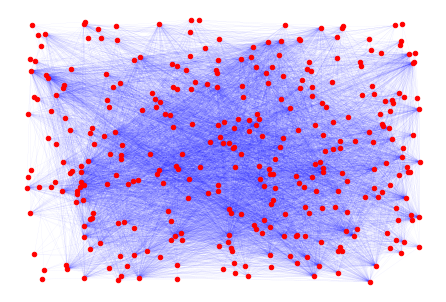

In [52]:
# 绘图，以下方法类似，区别在于参数不同，node_color表示节点颜色，edge_color表示边颜色，with_labels表示不带标签，node_size表示节点大小，width表示边宽度，style表示边的风格
# 可以根据自身需求进行调参

import matplotlib.pyplot as plt

#nx.draw(G1,pos = nx.random_layout(G1), node_color= 'r', edge_color = 'b', with_labels = False,node_size =20, width=0.1, style='dashed')
nx.draw(G1,pos = nx.random_layout(G1), node_color= 'r', edge_color = 'b', with_labels = False,node_size =20, width=0.05, style='dotted')
#nx.draw(G1,pos = nx.spectral_layout(G1), node_color= 'r', edge_color = 'b', with_labels = False,node_size =20, width=0.01, style='dotted')
#nx.draw(G1,pos = nx.shell_layout(G1), node_color= 'r', edge_color = 'b', with_labels = False,node_size =20, width=0.01, style='dotted')

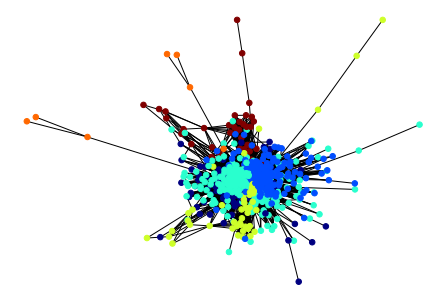

In [53]:
#利用社团检测算法Louvain划分社区

!pip install python-louvain

import community.community_louvain
part1 = community.community_louvain.best_partition(G1)
values1 = [part1.get(node) for node in G1.nodes()]

nx.draw_spring(G1, cmap = plt.get_cmap('jet'), node_color = values1, node_size=30, with_labels=False)#利用社团检测算法Louvain划分社区

#pip install python-louvain

import community.community_louvain
part1 = community.community_louvain.best_partition(G1)
values1 = [part1.get(node) for node in G1.nodes()]

nx.draw_spring(G1, cmap = plt.get_cmap('jet'), node_color = values1, node_size=30, with_labels=False)

In [54]:
#社区划分对应的模块
mod = community.community_louvain.modularity(part1,G1)
print("modularity:", mod)

modularity: 0.1772574302975593


In [55]:
# 导出为json文件
# 运行此代码，输出graph_from_networkx.json至本代码路径

from networkx.readwrite import json_graph
import json

data1 = json_graph.node_link_data(G1)
s1 = json.dump(data1, open('graph_from_networkx.json1','w'), indent=2) 

#### 2.3.2 第二种相关公司定义方法：利用P/E值定义边

In [56]:
#导入第二种定义结果列表
edges_list_networkx2 = edges_list_1
G2 = nx.Graph() # 创建Graph实例
G2.add_weighted_edges_from(edges_list_networkx2) # 由edges_list_networkx1创建加权图

# 查看网络属性方法
# G2.nodes()   #查看网络节点 len(G.nodes())查看网络节点数量
# G2.edges()   #查看网络属性 len(G.edges())查看网络边数量

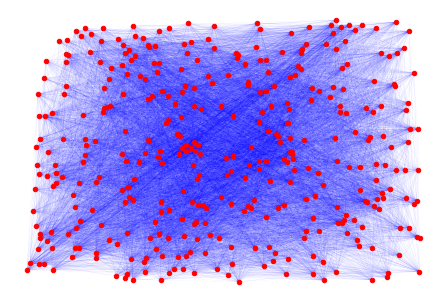

In [57]:
#nx.draw(G2,pos = nx.random_layout(G2), node_color= 'r', edge_color = 'b', with_labels = False,node_size =20, width=0.1, style='dashed')
nx.draw(G2,pos = nx.random_layout(G2), node_color= 'r', edge_color = 'b', with_labels = False,node_size =20, width=0.05, style='dotted')

modularity: 0.45162097549431296


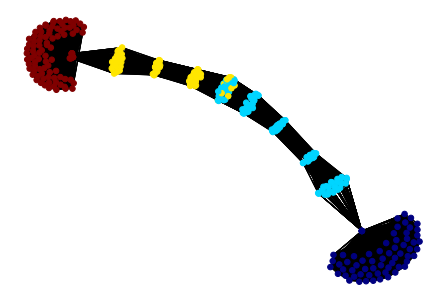

In [58]:
#利用社团检测算法Louvain划分社区

#pip install python-louvain


part2 = community.community_louvain.best_partition(G2)
values2 = [part2.get(node) for node in G2.nodes()]

nx.draw_spring(G2, cmap = plt.get_cmap('jet'), node_color = values2, node_size=30, with_labels=False)

#社区划分对应的模块
mod = community.community_louvain.modularity(part2,G2)
print("modularity:", mod)

In [59]:
# 导出为json文件

from networkx.readwrite import json_graph
import json

data2 = json_graph.node_link_data(G2)
s2 = json.dump(data2, open('graph_from_networkx.json2','w'), indent=2) 